In [1]:
import os
os.getcwd()

'C:\\Users\\haripriya_dittakavi\\Desktop\\IPBA\\BYOP'

In [2]:
cwd = "C:\\Users\\haripriya_dittakavi\\Desktop\\IPBA\\BYOP"
os.chdir(cwd)
os.getcwd()

'C:\\Users\\haripriya_dittakavi\\Desktop\\IPBA\\BYOP'

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("capstone_dataset_27jan.csv")
df_orig = df

In [5]:
df.shape

(576481, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576481 entries, 0 to 576480
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   item_id             576481 non-null  int64  
 1   status              576481 non-null  object 
 2   order_date          576481 non-null  object 
 3   item_description    576481 non-null  object 
 4   price               576481 non-null  float64
 5   qty_ordered         576481 non-null  int64  
 6   order_amount        576481 non-null  float64
 7   order_id            576481 non-null  object 
 8   category_name       576481 non-null  object 
 9   discount_amount     576481 non-null  float64
 10  payment_method      576481 non-null  object 
 11  working_date        576481 non-null  object 
 12  BI Status           576481 non-null  object 
 13  market_value        576481 non-null  int64  
 14  Year                576481 non-null  int64  
 15  Month               576481 non-nul

In [7]:
#df.category_name.value_counts()

In [8]:
#plt.figure(figsize = (25,8))
#fig = sns.countplot(df['category_name'])

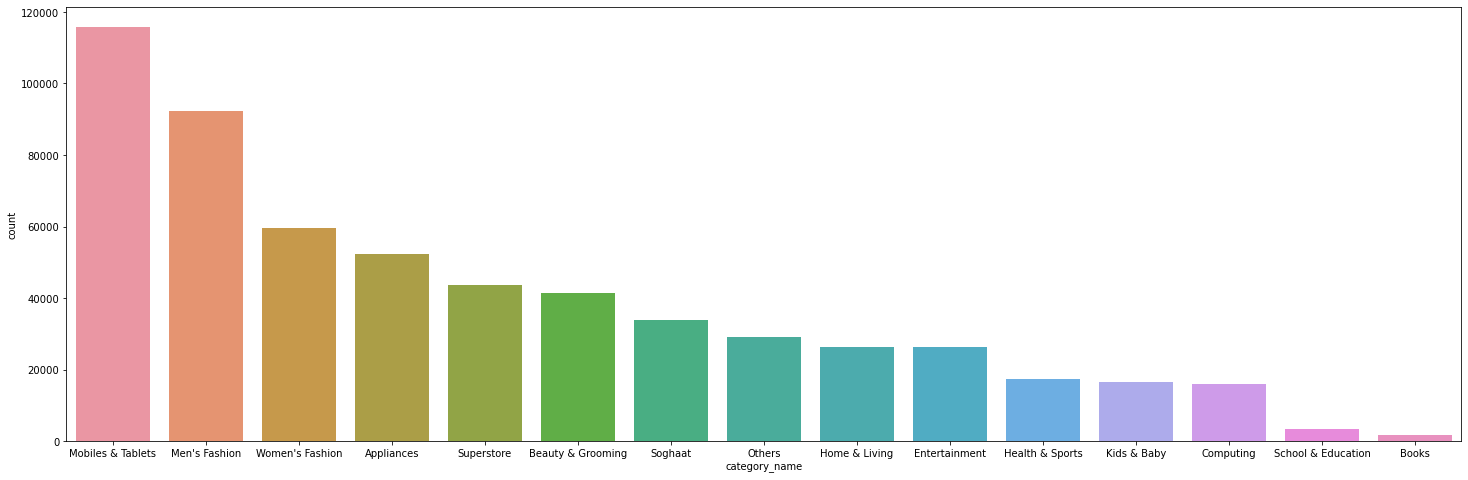

In [9]:
# Highest selling category
plt.figure(figsize = (25,8))
fig = sns.countplot(df['category_name'], order = df['category_name'].value_counts().index)

In [10]:
df1 = df

In [11]:
df1.shape

(576481, 22)

In [12]:
# df1 to hold only "completed" in "order_status"
#df1.head(2)

In [13]:
df1 = df1[df1.order_status == 'completed']

In [14]:
df1.shape
#df1.head(2)

(230949, 22)

In [15]:
# Market value contains commas which needs to be removed so as to convert datatype from object to int/float
#df1.market_value = df1.market_value.str.replace(",","") # replacing commas with blank

In [16]:
#df1.market_value = df1.market_value.str.replace("-","0") # replacing - values in the DF with 0 in MV

In [17]:
df1.head(2)

,item_id,status,order_date,item_description,price,qty_ordered,order_amount,order_id,category_name,discount_amount,...,BI Status,market_value,Year,Month,customer_since,M-Y,FY,customer_id,order_status,final_order_amount
0,313042,complete,11/23/16,Stek_Wireless Mouse-blue,332.0,1,332.0,100001290,Computing,0.0,...,Net,332,2016,11,11/1/16,11/1/16,2017,19328,completed,332.0
2,211131,complete,7/1/16,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,0.0,...,#REF!,1950,2016,7,7/1/16,7/1/16,2017,1,completed,1950.0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230949 entries, 0 to 576480
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   item_id             230949 non-null  int64  
 1   status              230949 non-null  object 
 2   order_date          230949 non-null  object 
 3   item_description    230949 non-null  object 
 4   price               230949 non-null  float64
 5   qty_ordered         230949 non-null  int64  
 6   order_amount        230949 non-null  float64
 7   order_id            230949 non-null  object 
 8   category_name       230949 non-null  object 
 9   discount_amount     230949 non-null  float64
 10  payment_method      230949 non-null  object 
 11  working_date        230949 non-null  object 
 12  BI Status           230949 non-null  object 
 13  market_value        230949 non-null  int64  
 14  Year                230949 non-null  int64  
 15  Month               230949 non-nul

In [19]:
df1.market_value =pd.to_numeric(df1.market_value)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230949 entries, 0 to 576480
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   item_id             230949 non-null  int64  
 1   status              230949 non-null  object 
 2   order_date          230949 non-null  object 
 3   item_description    230949 non-null  object 
 4   price               230949 non-null  float64
 5   qty_ordered         230949 non-null  int64  
 6   order_amount        230949 non-null  float64
 7   order_id            230949 non-null  object 
 8   category_name       230949 non-null  object 
 9   discount_amount     230949 non-null  float64
 10  payment_method      230949 non-null  object 
 11  working_date        230949 non-null  object 
 12  BI Status           230949 non-null  object 
 13  market_value        230949 non-null  int64  
 14  Year                230949 non-null  int64  
 15  Month               230949 non-nul

<AxesSubplot:xlabel='category_name', ylabel='market_value'>

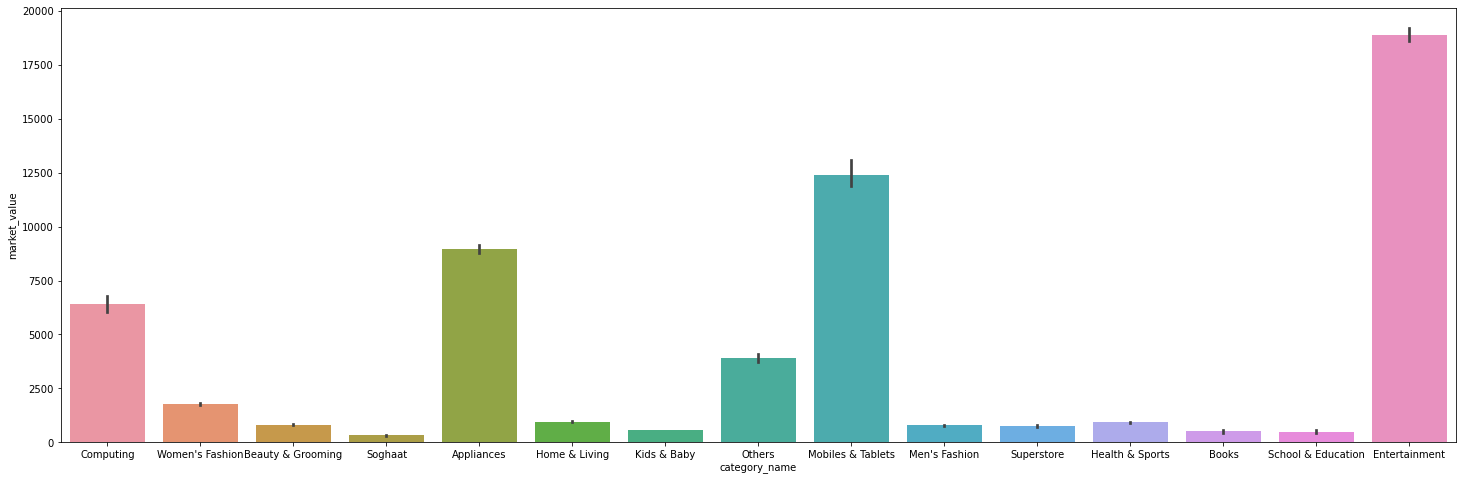

In [21]:
plt.figure(figsize = (25,8))
sns.barplot(x = 'category_name', y = 'market_value', data = df1)
# Below is for only completed "order_status" (column filtered in df1)

In [22]:
#Completed Order EDA - Payment Method
number_of_orders_by_payments_methods = df1.groupby('payment_method').size().reset_index(name='Number of orders').sort_values('Number of orders', ascending=False)
print(number_of_orders_by_payments_methods)

       payment_method  Number of orders
6                 cod            146279
2             Payaxis             22704
0             Easypay             19221
8     easypay_voucher             16067
12         jazzwallet             13248
11        jazzvoucher              4464
7      customercredit              4157
1          Easypay_MA              3116
4         bankalfalah               591
5      cashatdoorstep               412
14            mcblite               222
17      ublcreditcard               176
10    internetbanking               153
16      productcredit                85
3                 apg                27
15          mygateway                14
9   financesettlement                 9
13   marketingexpense                 4


In [23]:
data_orders_completed=df1

<AxesSubplot:xlabel='payment_method', ylabel='count'>

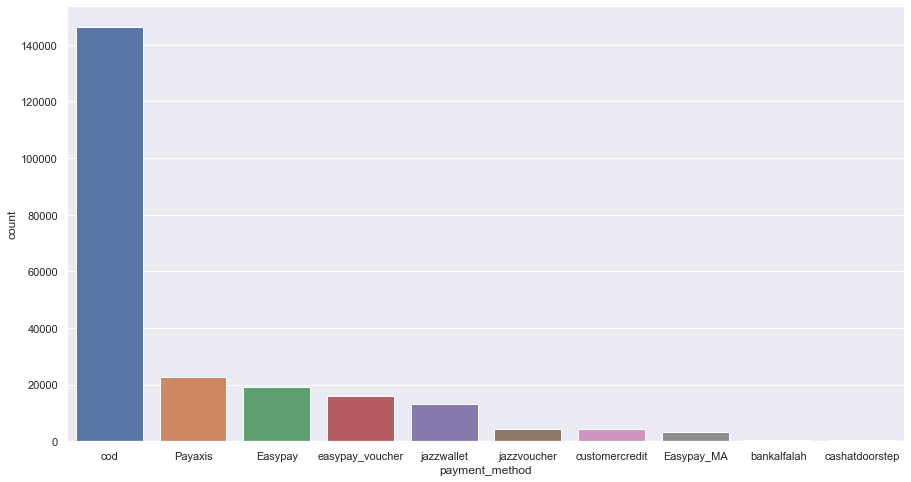

In [24]:
#Completed Order EDA - Payment Method
# Plot the different classes
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data_orders_completed['payment_method'],order=pd.value_counts(data_orders_completed['payment_method']).iloc[:10].index)

In [25]:
#Completed Order EDA - Product category
number_of_orders_by_category = data_orders_completed.groupby('category_name').size().reset_index(name='Number of orders').sort_values('Number of orders', ascending=False)
print(number_of_orders_by_category)

         category_name  Number of orders
9    Mobiles & Tablets             41721
8        Men's Fashion             40356
14     Women's Fashion             23805
0           Appliances             20801
1    Beauty & Grooming             20791
12             Soghaat             19808
13          Superstore             16703
6        Home & Living             11168
4        Entertainment              9334
5      Health & Sports              8064
7          Kids & Baby              7030
3            Computing              5751
10              Others              3115
11  School & Education              1585
2                Books               917


<AxesSubplot:xlabel='category_name', ylabel='count'>

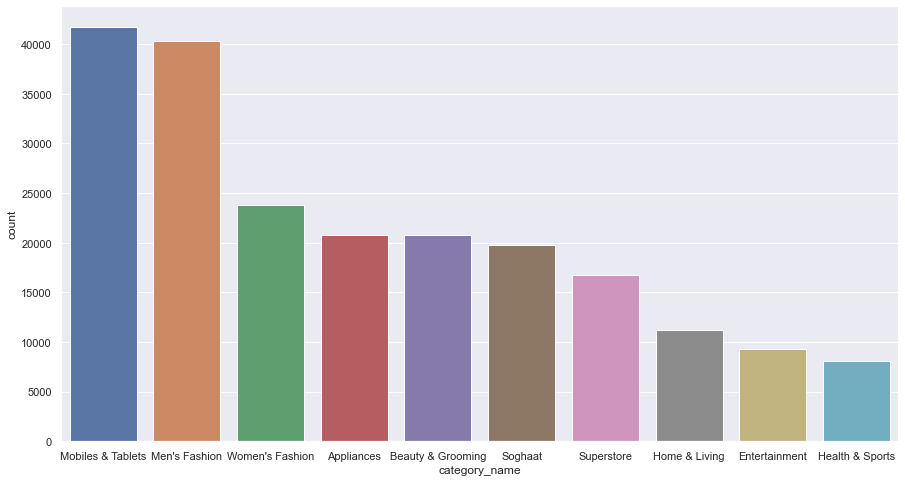

In [26]:
#Completed Order EDA - Product category
# Plot the different classes
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data_orders_completed['category_name'],order=pd.value_counts(data_orders_completed['category_name']).iloc[:10].index)

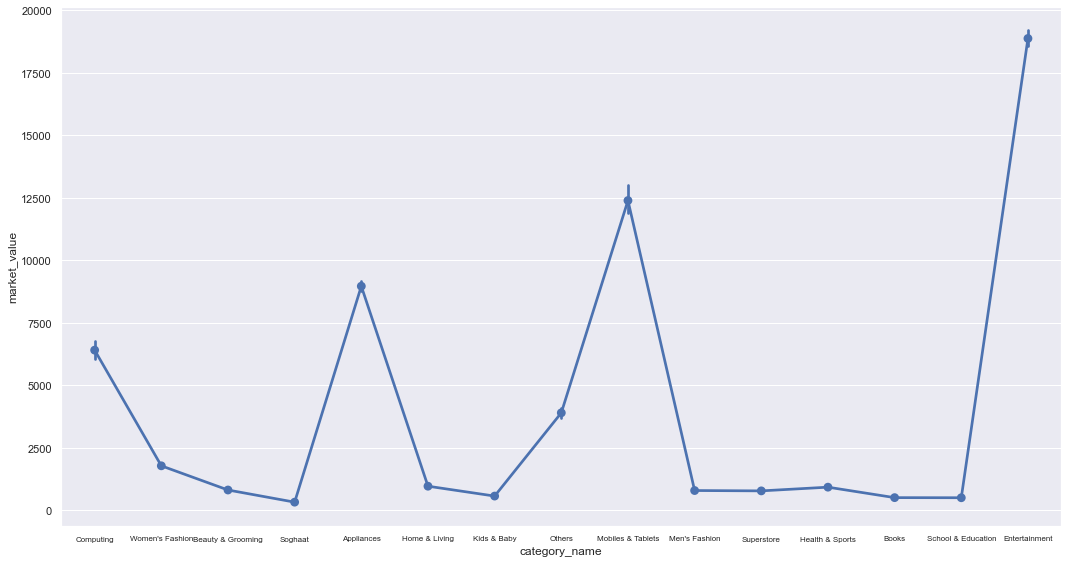

In [27]:
# Completed Order EDA - Market Value for each Product category
ax=sns.pointplot(y="market_value", x="category_name", data = data_orders_completed)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

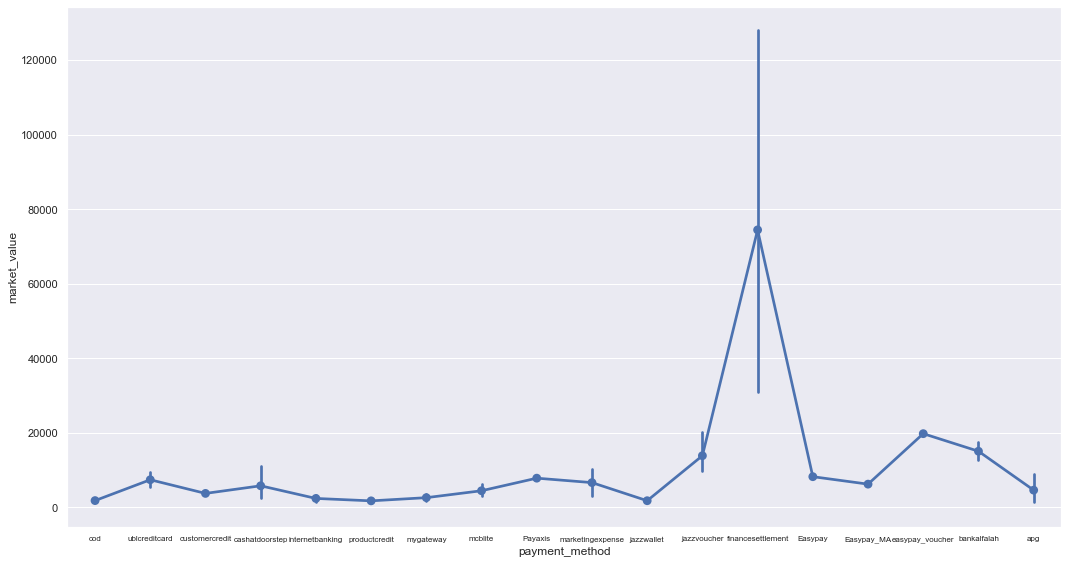

In [28]:
# Completed Order EDA - Market Value for each Payment method
ax=sns.pointplot(y="market_value", x="payment_method", data = data_orders_completed)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

In [29]:
data_orders_cancelled = df[df["order_status"] == "canceled"]

In [30]:
# Market value contains commas which needs to be removed so as to convert datatype from object to int/float
#data_orders_cancelled.market_value = data_orders_cancelled.market_value.str.replace(",","") # replacing commas with blank

In [31]:
#data_orders_cancelled.market_value = data_orders_cancelled.market_value.str.replace("-","0") # replacing - values in the DF with 0 in MV

In [32]:
#data_orders_cancelled.market_value =pd.to_numeric(data_orders_cancelled.market_value)

In [33]:
# Cancelled Order EDA - order count by Payment method
number_of_orders_by_payments_methods = data_orders_cancelled.groupby('payment_method').size().reset_index(name='Number of orders').sort_values('Number of orders', ascending=False)
print(number_of_orders_by_payments_methods)

       payment_method  Number of orders
2             Payaxis             60150
0             Easypay             51869
6                 cod             20917
12         jazzwallet             16415
4         bankalfalah             16179
8     easypay_voucher             12107
1          Easypay_MA              9147
11        jazzvoucher              8120
3                 apg              1361
14          mygateway               620
16      ublcreditcard               616
10    internetbanking               262
13            mcblite               167
7      customercredit                34
5      cashatdoorstep                 3
15      productcredit                 2
9   financesettlement                 1


<AxesSubplot:xlabel='payment_method', ylabel='count'>

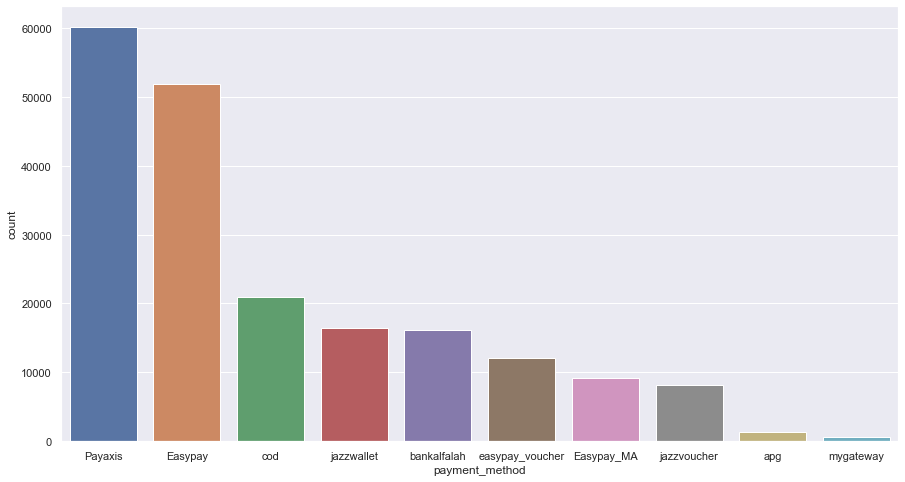

In [34]:
# Cancelled Order EDA - order count by Payment method
# Plot the different classes
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data_orders_cancelled['payment_method'],order=pd.value_counts(data_orders_cancelled['payment_method']).iloc[:10].index)

In [35]:
# Cancelled Order EDA - order count by Product category
number_of_orders_by_category = data_orders_cancelled.groupby('category_name').size().reset_index(name='Number of orders').sort_values('Number of orders', ascending=False)
print(number_of_orders_by_category)

         category_name  Number of orders
9    Mobiles & Tablets             53715
8        Men's Fashion             22024
0           Appliances             21628
10              Others             18364
14     Women's Fashion             15961
13          Superstore             13926
4        Entertainment             12578
1    Beauty & Grooming              9686
12             Soghaat              7593
6        Home & Living              7199
3            Computing              6811
7          Kids & Baby              4081
5      Health & Sports              3382
11  School & Education               749
2                Books               273


<AxesSubplot:xlabel='category_name', ylabel='count'>

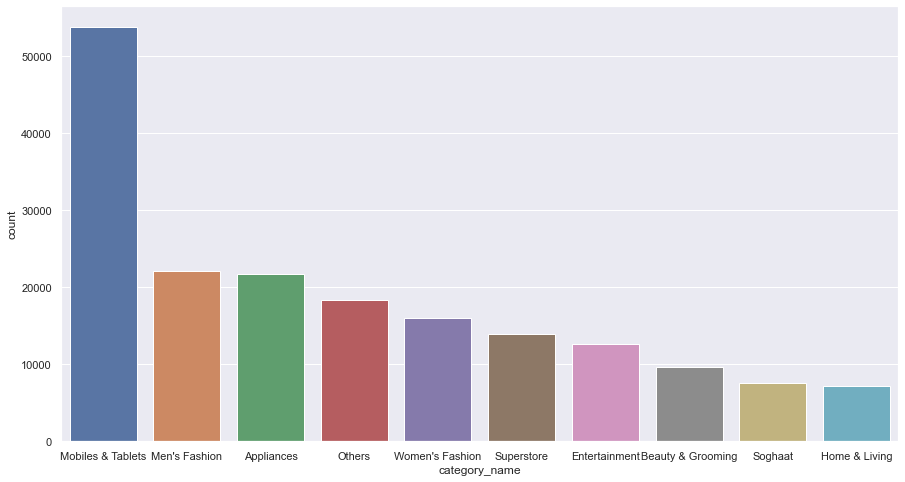

In [36]:
# Cancelled Order EDA - order count by Product category
# Plot the different classes
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data_orders_cancelled['category_name'],order=pd.value_counts(data_orders_cancelled['category_name']).iloc[:10].index)

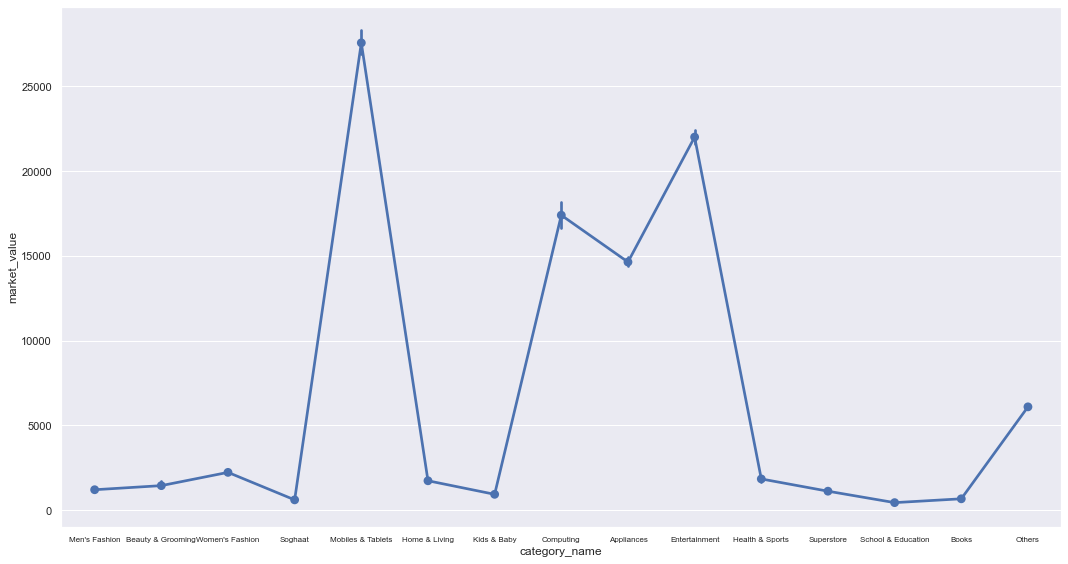

In [37]:
# Cancelled Order EDA - market value by Product category
ax=sns.pointplot(y="market_value", x="category_name", data = data_orders_cancelled)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

In [81]:
np.sum(data_orders_cancelled.market_value ==(['Mobiles']))

2424178320

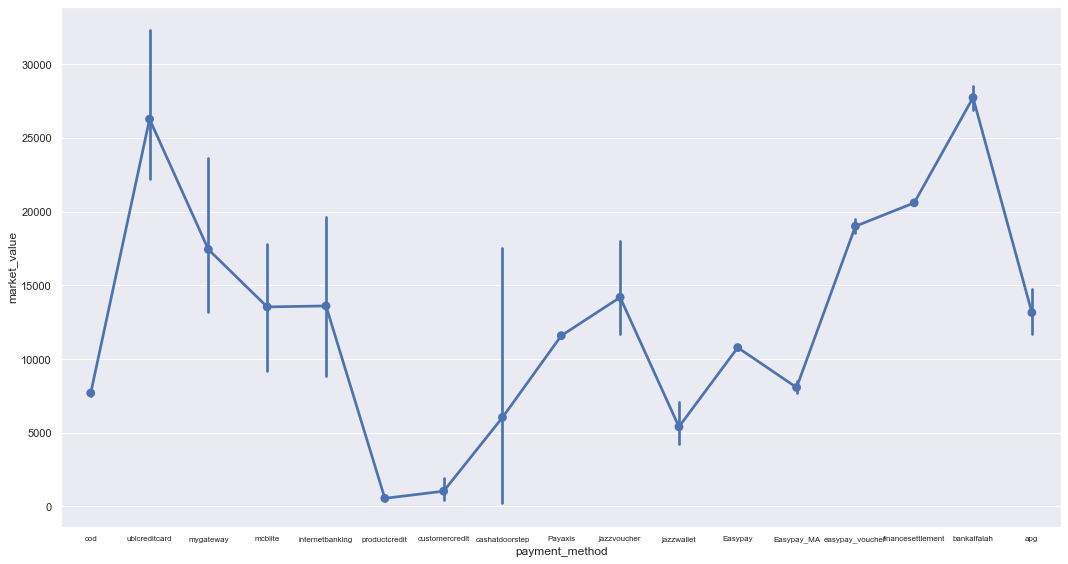

In [38]:
# Cancelled Order EDA - market value by Payment Method
ax=sns.pointplot(y="market_value", x="payment_method", data = data_orders_cancelled)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

In [39]:
# Cancelled Order EDA - Customer wise aggregation
CustomerID=data_orders_cancelled.customer_id.unique()

In [40]:
# Cancelled Order EDA - Customer wise aggregation - No. of orders
#Top 20 customers whose cancelled orders count is high
CancelOrders_customer = data_orders_cancelled.groupby('customer_id').size().reset_index(name='Number of orders').sort_values('Number of orders', ascending=False)
print(CancelOrders_customer[0:19])

       customer_id  Number of orders
34253        87724               685
39041        96927               590
14926        39707               496
11609        26527               484
25223        65910               421
18221        47178               410
4686         10654               381
12302        28896               372
3592          8963               352
5245         12278               292
5209         12179               287
21399        56449               275
5727         13793               257
19565        50256               228
5320         12535               223
47943       113694               222
19478        49982               222
1839          4797               219
22483        59331               219


In [41]:
 CancelOrders_customer = pd.DataFrame(CancelOrders_customer)#, index=['customer_id','Number of orders'])

In [42]:
CancelOrders_customer.head()

,customer_id,Number of orders
34253,87724,685
39041,96927,590
14926,39707,496
11609,26527,484
25223,65910,421


In [43]:
# Cancelled Order EDA - Customer wise aggregation - sum of market value
CancelOrders_customerval = data_orders_cancelled.groupby('customer_id').aggregate('sum')['market_value']
print(CancelOrders_customerval[0:19])

customer_id
2         510
3        2450
4      866207
6          80
8      192998
11       3500
13      16715
14       2118
15        395
16     346552
18       3000
20    1829144
21     141747
22        940
23       3350
25      11000
27       6152
28      46248
29        350
Name: market_value, dtype: int64


In [44]:
# Cancelled Order EDA - Customer wise aggregation - sum of market value
CancelOrders_customerval = pd.DataFrame(CancelOrders_customerval)
CancelOrders_customerval.columns=['TotalMV_cancelled']
CancelOrders_customerval = CancelOrders_customerval.reset_index()

In [45]:
CancelOrders_customerval.head()

,customer_id,TotalMV_cancelled
0,2,510
1,3,2450
2,4,866207
3,6,80
4,8,192998


In [46]:
#Top 20 customers whose cancelled orders Market value is high
Top100MV=CancelOrders_customerval.sort_values('TotalMV_cancelled', ascending=False)[0:100]
Top100MV

,customer_id,TotalMV_cancelled
1913,5032,35839398
47943,113694,16153539
14926,39707,15627178
45993,109038,15425807
4686,10654,14426633
...,...,...
46682,110632,2160382
12610,30310,2147944
46030,109127,2133779
12196,28462,2096942


In [47]:
top100MV_Percent=round((sum(Top100MV.TotalMV_cancelled)/sum(CancelOrders_customerval.TotalMV_cancelled))*100,2)
top100MV_Percent

20.27

In [48]:
sum(CancelOrders_customerval.TotalMV_cancelled)

2424178320

In [49]:
sum(Top100MV.TotalMV_cancelled)

491437064

In [50]:
#Out of 48K unique customers, there are 100 customers whose cancelled orders value contribute to 20% of total cancelled order value.
#Business can focus on understanding the needs of these customers and convert them to business realized

In [51]:
data_orders_refund = df[df["order_status"] == "refund"]

In [52]:
# Market value contains commas which needs to be removed so as to convert datatype from object to int/float
#data_orders_refund.market_value = data_orders_refund.market_value.str.replace(",","") # replacing commas with blank
#data_orders_refund.market_value = data_orders_refund.market_value.str.replace("-","0") # replacing - values in the DF with 0 in MV
#data_orders_refund.market_value =pd.to_numeric(data_orders_refund.market_value)

In [53]:
#Refund Order EDA - Payment Method
number_of_orders_by_payments_methods = data_orders_refund.groupby('payment_method').size().reset_index(name='Number of orders').sort_values('Number of orders', ascending=False)
print(number_of_orders_by_payments_methods)

       payment_method  Number of orders
6                 cod            100533
2             Payaxis             13363
0             Easypay             11591
4         bankalfalah              6207
12         jazzwallet              4650
7      customercredit              3315
8     easypay_voucher              2876
11        jazzvoucher              2506
1          Easypay_MA              1682
3                 apg               370
14            mcblite               144
5      cashatdoorstep                49
17      ublcreditcard                33
10    internetbanking                25
16      productcredit                24
9   financesettlement                 5
13   marketingexpense                 2
15          mygateway                 1


<AxesSubplot:xlabel='payment_method', ylabel='count'>

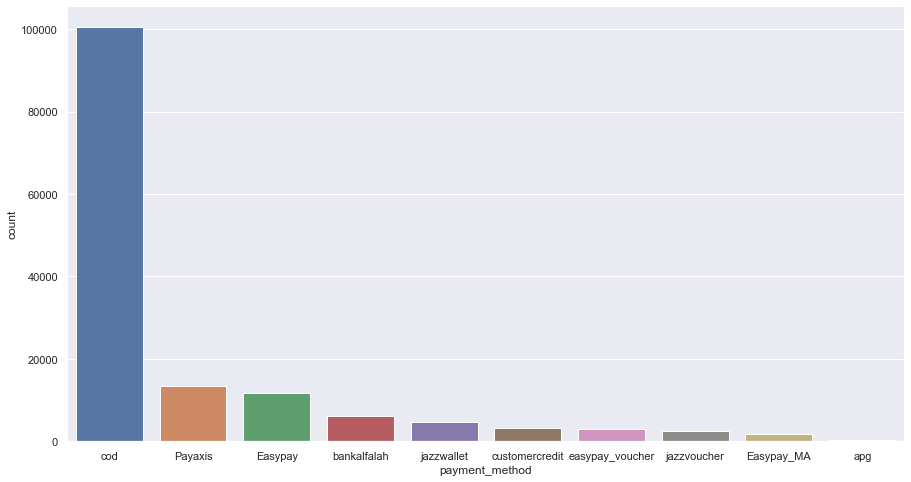

In [54]:
#Refund Order EDA - Payment Method
# Plot the different classes
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data_orders_refund['payment_method'],order=pd.value_counts(data_orders_refund['payment_method']).iloc[:10].index)

In [55]:
#Refund Order EDA - Product category
number_of_orders_by_category = data_orders_refund.groupby('category_name').size().reset_index(name='Number of orders').sort_values('Number of orders', ascending=False)
print(number_of_orders_by_category)

         category_name  Number of orders
8        Men's Fashion             29804
9    Mobiles & Tablets             20231
14     Women's Fashion             19946
13          Superstore             12953
1    Beauty & Grooming             11010
0           Appliances              9968
6        Home & Living              8131
10              Others              7725
12             Soghaat              6597
5      Health & Sports              6050
7          Kids & Baby              5378
4        Entertainment              4394
3            Computing              3366
11  School & Education              1143
2                Books               680


<AxesSubplot:xlabel='category_name', ylabel='count'>

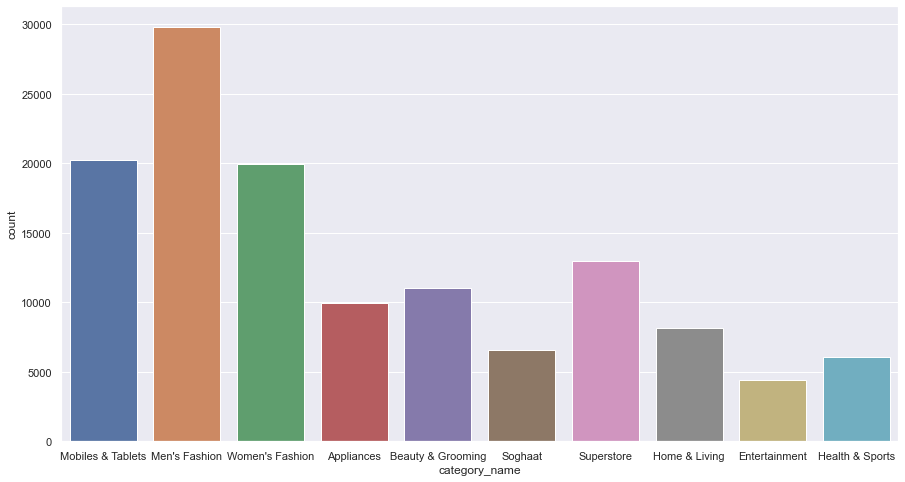

In [56]:
#Refund Order EDA - Product category
# Plot the different classes
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data_orders_refund['category_name'],order=pd.value_counts(data_orders_completed['category_name']).iloc[:10].index)

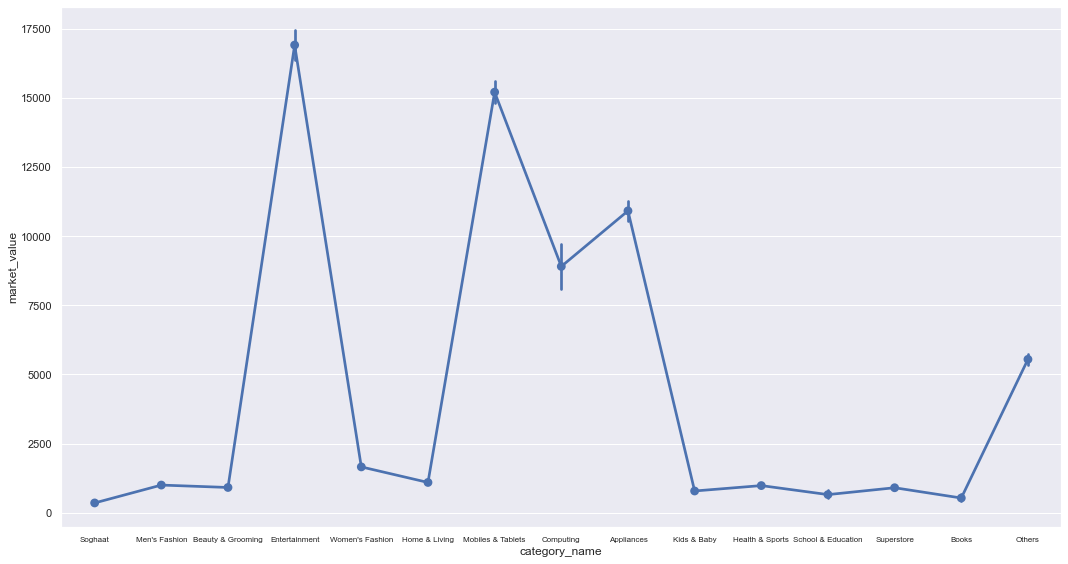

In [57]:
# Refund Order EDA - market value by Product category
ax=sns.pointplot(y="market_value", x="category_name", data = data_orders_refund)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

In [58]:
# Completed Orders data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230949 entries, 0 to 576480
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   item_id             230949 non-null  int64  
 1   status              230949 non-null  object 
 2   order_date          230949 non-null  object 
 3   item_description    230949 non-null  object 
 4   price               230949 non-null  float64
 5   qty_ordered         230949 non-null  int64  
 6   order_amount        230949 non-null  float64
 7   order_id            230949 non-null  object 
 8   category_name       230949 non-null  object 
 9   discount_amount     230949 non-null  float64
 10  payment_method      230949 non-null  object 
 11  working_date        230949 non-null  object 
 12  BI Status           230949 non-null  object 
 13  market_value        230949 non-null  int64  
 14  Year                230949 non-null  int64  
 15  Month               230949 non-nul

In [59]:
from datetime import datetime, timedelta,date
df1['order_date'] = pd.to_datetime(df1['order_date'])

In [60]:
df_1styr = df1[(df1.order_date < datetime(2017,6,30)) & (df1.order_date >= datetime(2016,7,1))].reset_index(drop=True)
df_2ndyr = df1[(df1.order_date < datetime(2018,6,30)) & (df1.order_date >= datetime(2017,7,1))].reset_index(drop=True)

In [61]:
df_1styr = df_1styr.sort_values(by='customer_id')

# Recency
## To calculate the Recency we will follow the steps below:

### Convert the Working Date column to datetime format
### Set the reference date as the lastest date in the data
### Filter out the most recent purchase date for each customer
### Calculate the Recency by subtracting most recent purchase date from the reference date

In [62]:
df_1styr['order_date'] = pd.to_datetime(df_1styr['order_date'])
#Last transaction date 
ref_date = df_1styr['order_date'].max()
df_1styr['Date'] = df_1styr['order_date'].apply(lambda x: x.date())
df_1styr['Most_Recent_Purchase'] = df_1styr.groupby('customer_id')['Date'].transform(max)
df_1styr['Recency'] = (ref_date.date() - df_1styr.Most_Recent_Purchase).astype('timedelta64[D]')

In [63]:
#df_1styr['Recency'] = df_1styr['Recency']/365

## Frequency

In [64]:
df_1styr['Frequency'] = df_1styr.groupby('customer_id')['order_id'].transform('nunique')

## Monetary

In [65]:
df_1styr['Monetary'] = df_1styr.groupby('customer_id')['final_order_amount'].transform(sum)

In [66]:
df_1styr.head()

,item_id,status,order_date,item_description,price,qty_ordered,order_amount,order_id,category_name,discount_amount,...,M-Y,FY,customer_id,order_status,final_order_amount,Date,Most_Recent_Purchase,Recency,Frequency,Monetary
1,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,0.0,...,7/1/16,2017,1,completed,1950.0,2016-07-01,2016-07-01,363.0,1,1950.0
112160,473369,complete,2017-05-19,BT_BT-422,530.0,1,1245.0,100306394,Men's Fashion,0.0,...,5/1/17,2017,3,completed,530.0,2017-05-19,2017-05-19,41.0,1,1245.0
112161,473370,complete,2017-05-19,ALHAMRA_US-0961-K,299.0,1,1245.0,100306394,Men's Fashion,0.0,...,5/1/17,2017,3,completed,299.0,2017-05-19,2017-05-19,41.0,1,1245.0
112162,473371,complete,2017-05-19,e-seller_7,66.0,1,1245.0,100306394,Mobiles & Tablets,0.0,...,5/1/17,2017,3,completed,66.0,2017-05-19,2017-05-19,41.0,1,1245.0
112163,473372,complete,2017-05-19,BD_BIG DEAL_16,350.0,1,1245.0,100306394,Mobiles & Tablets,0.0,...,5/1/17,2017,3,completed,350.0,2017-05-19,2017-05-19,41.0,1,1245.0


In [67]:
df_rfm = df_1styr[['customer_id','Recency','Frequency','Monetary']]

In [68]:
df_rfm.head()

,customer_id,Recency,Frequency,Monetary
1,1,363.0,1,1950.0
112160,3,41.0,1,1245.0
112161,3,41.0,1,1245.0
112162,3,41.0,1,1245.0
112163,3,41.0,1,1245.0


In [69]:
df_rfm = df_rfm.drop_duplicates()

In [70]:
df_rfm.shape

(35420, 4)

## Clustering

In [71]:
RFM_quantiles = df_rfm[['Recency', 'Frequency', 'Monetary']].quantile(q = [0.25, 0.5, 0.75])

In [72]:
df_rfm.loc[(df_rfm['Recency'] <= RFM_quantiles.Recency[0.25]), 'Rscore'] = 4.0
df_rfm.loc[(df_rfm['Recency'] > RFM_quantiles.Recency[0.25]) & (df_rfm.Recency <= RFM_quantiles.Recency[0.5]), 'Rscore'] = 3.0
df_rfm.loc[(df_rfm['Recency'] > RFM_quantiles.Recency[0.5]) & (df_rfm.Recency <= RFM_quantiles.Recency[0.75]), 'Rscore'] = 2.0
df_rfm.loc[(df_rfm['Recency'] > RFM_quantiles.Recency[0.75]), 'Rscore'] = 1.0
df_rfm.loc[(df_rfm['Frequency'] <= RFM_quantiles.Frequency[0.25]), 'Fscore'] = 1.0
df_rfm.loc[(df_rfm['Frequency'] > RFM_quantiles.Frequency[0.25]) & (df_rfm['Frequency'] <= RFM_quantiles.Frequency[0.5]), 'Fscore'] = 2.0
df_rfm.loc[(df_rfm['Frequency'] > RFM_quantiles.Frequency[0.5]) & (df_rfm['Frequency'] <= RFM_quantiles.Frequency[0.75]), 'Fscore'] = 3.0
df_rfm.loc[(df_rfm['Frequency'] > RFM_quantiles.Frequency[0.75]), 'Fscore'] = 4.0
df_rfm.loc[(df_rfm['Monetary'] <= RFM_quantiles.Monetary[0.25]), 'Mscore'] = 1.0
df_rfm.loc[(df_rfm['Monetary'] > RFM_quantiles.Monetary[0.25]) & (df_rfm['Monetary'] <= RFM_quantiles.Monetary[0.5]), 'Mscore'] = 2.0
df_rfm.loc[(df_rfm['Monetary'] > RFM_quantiles.Monetary[0.5]) & (df_rfm['Monetary'] <= RFM_quantiles.Monetary[0.75]), 'Mscore'] = 3.0
df_rfm.loc[(df_rfm['Monetary'] > RFM_quantiles.Monetary[0.75]), 'Mscore'] = 4.0

df_rfm['RFM_score'] = df_rfm.Rscore + df_rfm.Fscore + df_rfm.Mscore


In [73]:
df_rfm.head()

,customer_id,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_score
1,1,363.0,1,1950.0,1.0,1.0,3.0,5.0
112160,3,41.0,1,1245.0,4.0,1.0,2.0,7.0
13597,4,36.0,211,989663.0,4.0,4.0,4.0,12.0
4,6,363.0,1,170.0,1.0,1.0,1.0,3.0
102506,7,75.0,4,1939.0,4.0,4.0,3.0,11.0


In [74]:
df_rfm.loc[(df_rfm['RFM_score'] == 12.0), 'Cluster'] = 'Champions'
df_rfm.loc[(df_rfm['RFM_score'] == 11.0), 'Cluster'] = 'Loyal Customers'
df_rfm.loc[(df_rfm['RFM_score'] >= 9.0) & (df_rfm['RFM_score'] <= 10.0), 'Cluster'] = 'Promising Customers'
df_rfm.loc[(df_rfm['RFM_score'] >= 7.0) & (df_rfm['RFM_score'] <= 8.0), 'Cluster'] = 'At Risk'
df_rfm.loc[(df_rfm['RFM_score'] >= 4.0) & (df_rfm['RFM_score'] <= 6.0), 'Cluster'] = 'Hibernating'
df_rfm.loc[(df_rfm['RFM_score'] == 3.0), 'Cluster'] = 'Lost Customers'

In [75]:
df_rfm['Cluster'].value_counts()

Hibernating            15290
At Risk                 8861
Promising Customers     5211
Lost Customers          2534
Loyal Customers         1839
Champions               1685
Name: Cluster, dtype: int64

In [76]:
df_rfm.head()

,customer_id,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_score,Cluster
1,1,363.0,1,1950.0,1.0,1.0,3.0,5.0,Hibernating
112160,3,41.0,1,1245.0,4.0,1.0,2.0,7.0,At Risk
13597,4,36.0,211,989663.0,4.0,4.0,4.0,12.0,Champions
4,6,363.0,1,170.0,1.0,1.0,1.0,3.0,Lost Customers
102506,7,75.0,4,1939.0,4.0,4.0,3.0,11.0,Loyal Customers


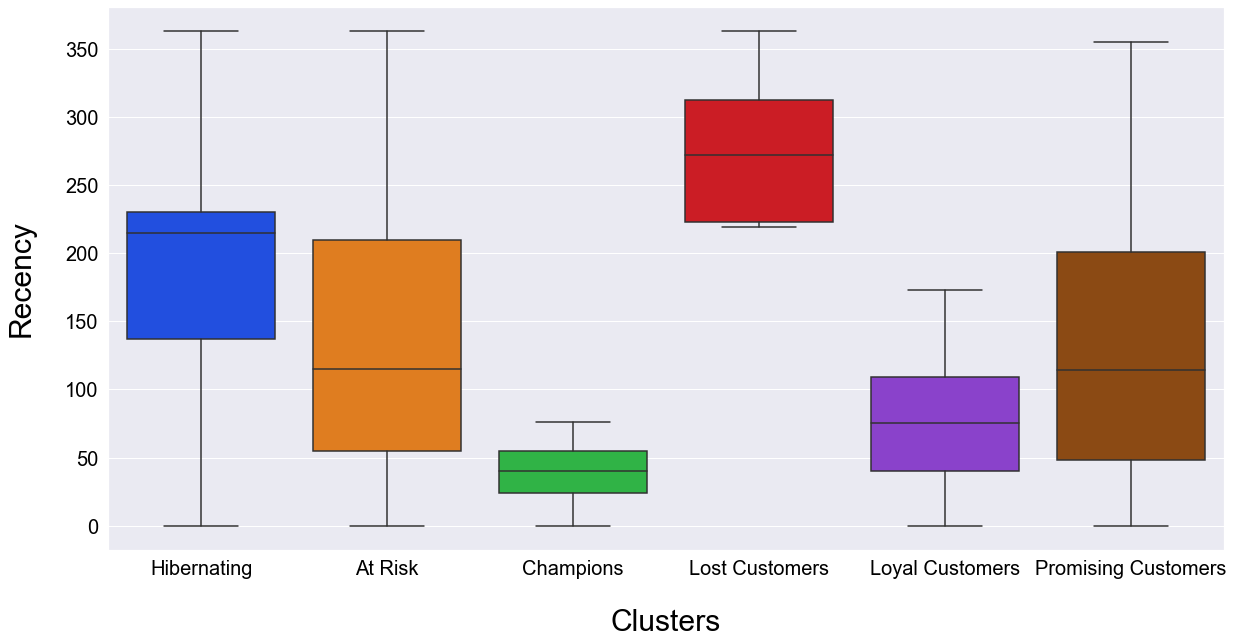

In [77]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(data=df_rfm, x='Cluster', y = 'Recency', palette='bright');
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=30, color='black')
plt.ylabel('Recency', fontsize=30, labelpad=30, color='black');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

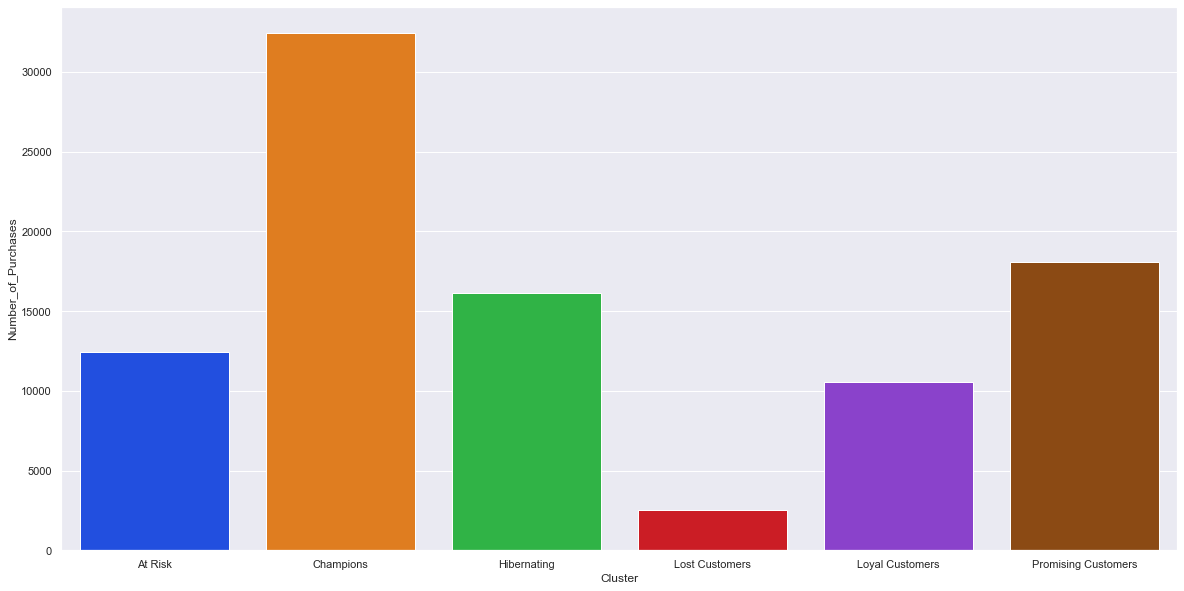

In [78]:
frequency = df_rfm.groupby('Cluster')['Frequency'].sum()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Number_of_Purchases'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Number_of_Purchases', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='black')
plt.ylabel('No. of Purchases', fontsize=30, labelpad=24, color='black');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

## Computation of CLTV


In [79]:
AvgOv = (df_2ndyr['final_order_amount'].sum())/(df_2ndyr['order_id'].nunique())
AvgOv

9365.824716007442

In [80]:
# the orders data is for 2 years one month, purchase frequency if to be calculated quarter level, then it is 8 quarters
# calculating PurFr - Purchase Frequency = Total Orders count / Total Customers count
PurFr = (df_2ndyr['order_id'].nunique())/(df_2ndyr['customer_id'].nunique())# this is pur freq for 2 years
PurFr

2.0843400385012414

In [81]:
# calculating CV, Customer Value = Average Order Value x Purchase Frequency
CV = AvgOv*PurFr
CV

19521.56344915883

In [82]:
df_2ndyr['First_Purchase'] = df_2ndyr.groupby('customer_id')['order_date'].transform(min)
df_2ndyr['Most_Recent_Purchase'] = df_2ndyr.groupby('customer_id')['order_date'].transform(max)
## Adding 1 to life span to nulify the effect of subtraction in that customer which has purchased only 1 time.
df_2ndyr['Life_Span'] = (df_2ndyr.Most_Recent_Purchase - df_2ndyr.First_Purchase).astype('timedelta64[D]')

In [83]:
df_2ndyr.sample(5)

,item_id,status,order_date,item_description,price,qty_ordered,order_amount,order_id,category_name,discount_amount,...,Month,customer_since,M-Y,FY,customer_id,order_status,final_order_amount,First_Purchase,Most_Recent_Purchase,Life_Span
40597,647529,complete,2017-11-19,BAGELM5A094F3D07AD6,237.0,1,1709.0,100397845,Beauty & Grooming,0.0,...,11,9/1/16,11/1/17,2018,8561,completed,237.0,2017-10-08,2017-11-19,42.0
95561,789838,complete,2018-03-17,MEFKAR5A7C13F10C4B3,410.0,1,1280.0,100484551,Men's Fashion,82.0,...,3,3/1/18,3/1/18,2018,96792,completed,328.0,2018-03-17,2018-03-17,0.0
9850,552887,complete,2017-08-07,jj_20100559-999-HOC,685.0,1,2015.0,100343834,Beauty & Grooming,0.0,...,8,8/1/17,8/1/17,2018,56853,completed,685.0,2017-08-07,2017-12-24,139.0
40165,646497,complete,2017-11-19,MATMOT59FC5E234E733,18555.0,1,14555.0,100397288,Mobiles & Tablets,0.0,...,11,11/1/17,11/1/17,2018,69987,completed,18555.0,2017-11-18,2017-11-19,1.0
8255,546812,complete,2017-07-31,BD_BIG DEAL_10,1000.0,1,0.0,100341531,Mobiles & Tablets,0.0,...,7,7/1/17,7/1/17,2018,54018,completed,1000.0,2017-07-12,2017-07-31,19.0


In [84]:
df_2ndyr['Life_Span'] = df_2ndyr['Life_Span']/365

In [85]:
df_2ndyr['CLTV'] = df_2ndyr['Life_Span']*CV

In [86]:
df_2ndyr_final =  df_2ndyr[['customer_id','CLTV']]
df_2ndyr_final.sample(5)

,customer_id,CLTV
78473,88089,0.000000
56524,79241,3904.312690
81510,61414,6631.983199
44180,32082,7327.271760
59372,77015,106.967471


In [87]:
df_2ndyr_final = df_2ndyr_final.drop_duplicates()

In [88]:
df_2ndyr_final.shape

(35843, 2)

In [89]:
df_final = pd.merge(df_rfm, df_2ndyr_final, on='customer_id', how ='inner')

In [90]:
df_2ndyr[df_2ndyr['customer_id']==23]

,item_id,status,order_date,item_description,price,qty_ordered,order_amount,order_id,category_name,discount_amount,...,customer_since,M-Y,FY,customer_id,order_status,final_order_amount,First_Purchase,Most_Recent_Purchase,Life_Span,CLTV
1540,530247,complete,2017-07-10,Delsey_94542012,963.0,1,1528.0,100333763,Home & Living,0.0,...,7/1/16,7/1/17,2018,23,completed,963.0,2017-07-10,2017-07-10,0.0,0.0
1541,530248,complete,2017-07-10,TCM_Model EW6,340.0,1,1528.0,100333763,Health & Sports,0.0,...,7/1/16,7/1/17,2018,23,completed,340.0,2017-07-10,2017-07-10,0.0,0.0
1542,530249,complete,2017-07-10,sheraton_SS_WS_01,225.0,1,1528.0,100333763,Health & Sports,0.0,...,7/1/16,7/1/17,2018,23,completed,225.0,2017-07-10,2017-07-10,0.0,0.0


In [91]:
print(df_final.shape)
df_final.head()

(4941, 10)


,customer_id,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_score,Cluster,CLTV
0,4,36.0,211,989663.0,4.0,4.0,4.0,12.0,Champions,5936.694638
1,15,5.0,8,14389.0,4.0,4.0,4.0,12.0,Champions,9573.588650
2,20,19.0,203,1455429.0,4.0,4.0,4.0,12.0,Champions,11819.905540
3,21,215.0,4,40122.0,2.0,4.0,4.0,10.0,Promising Customers,8450.430205
4,23,119.0,11,24116.0,3.0,4.0,4.0,11.0,Loyal Customers,0.000000


<AxesSubplot:ylabel='CLTV'>

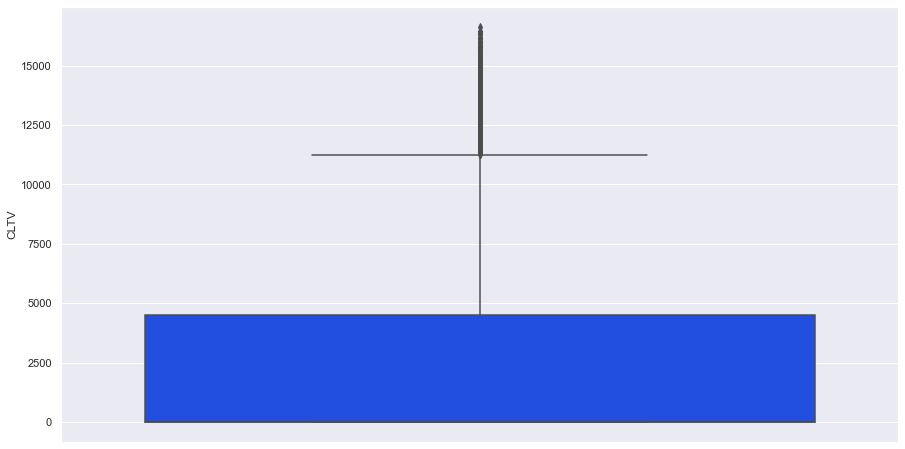

In [92]:
sns.boxplot(data=df_final, y = 'CLTV', palette='bright')

In [93]:
df_final[df_final['CLTV'] >= 12000].nunique()

customer_id    290
Recency        117
Frequency       57
Monetary       282
Rscore           4
Fscore           3
Mscore           4
RFM_score       10
Cluster          6
CLTV            81
dtype: int64

In [94]:
df_final.Cluster.value_counts()

Hibernating            1095
At Risk                1086
Promising Customers    1044
Champions               954
Loyal Customers         627
Lost Customers          135
Name: Cluster, dtype: int64

In [95]:
# models we are using
# Linear regression
# Bagging
# Random Forest
# Boosting
# SVM- Support vector machines if time allows

In [96]:
df_final1 = df_final.drop(['Rscore','Fscore', 'Mscore', 'RFM_score', 'Cluster'],axis =1)

In [97]:
df_final1.head()

,customer_id,Recency,Frequency,Monetary,CLTV
0,4,36.0,211,989663.0,5936.694638
1,15,5.0,8,14389.0,9573.588650
2,20,19.0,203,1455429.0,11819.905540
3,21,215.0,4,40122.0,8450.430205
4,23,119.0,11,24116.0,0.000000


In [98]:
#Creating X and Y as feature set and target variable set.
X = df_final1.drop(["customer_id", "CLTV"], axis = 1)
Y = df_final1["CLTV"]
Y = pd.DataFrame(Y)

### Bagging Regressor

## XG Boost

In [99]:
!pip install xgboost

In [100]:
import xgboost as xgb

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [102]:
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(1483, 3)
(1483, 1)
(3458, 3)
(3458, 1)


In [103]:
model = xgb.XGBRegressor(n_estimators=1000, eta=0.1, random_state = 10)

# Fitting the model
model.fit(X_train,Y_train)

# Predict the model
pred = model.predict(X_test)

In [104]:
pred

array([4461.506 ,  818.3764, 2855.1816, ..., 4740.39  , 4100.8755,
       1005.224 ], dtype=float32)

In [105]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, pred))
rmse

4461.168041719663

In [106]:
accuracy = model.score(X_test,Y_test)
accuracy

-0.17737908624700838

In [107]:
Y_test.head()

,CLTV
1122,1711.479535
4867,213.934942
4483,320.902413
3683,12461.710366
2125,8236.495263


## XGBRegressor with Objective as linear regression

In [108]:
# Instantiation
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train,Y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse1 = np.sqrt(mean_squared_error(Y_test, pred))
print("RMSE : % f" %(rmse1))

[13:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  3969.733771


# XGB Regressor with hyper parameters

In [109]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

In [110]:
lambda_values = [1, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100]
for val in lambda_values:
    xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objective='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05, reg_lambda=val)


    xgb_reg.fit(X_train, Y_train)

    y_pred = xgb_reg.predict(X_test)

    MSE = mean_squared_error(Y_test, y_pred)
    RMSE = np.sqrt(MSE)

    R_squared = r2_score(Y_test, y_pred)

    print("lambda = ", val)
    print("RMSE: ", np.round(RMSE, 2))
    #print("R-Squared: ", np.round(R_squared, 2))
    print()

lambda =  1
RMSE:  3867.53

lambda =  10
RMSE:  3856.24

lambda =  15
RMSE:  3854.0

lambda =  20
RMSE:  3854.38

lambda =  25
RMSE:  3855.22

lambda =  30
RMSE:  3860.41

lambda =  35
RMSE:  3858.59

lambda =  40
RMSE:  3862.34

lambda =  45
RMSE:  3862.27

lambda =  50
RMSE:  3859.21

lambda =  100
RMSE:  3863.8



# Random Forest Regressor

In [111]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,Y_train);

In [112]:
## Use the forest's predict method on the test data
predictions = rf.predict(X_test)

rmse2 = np.sqrt(mean_squared_error(Y_test, predictions))
print("RMSE : % f" %(rmse2))

RMSE :  4147.339022


## Bagging Model

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [114]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(4941, 3)
(4941, 1)
(3458, 3)
(3458, 1)
(1483, 3)
(1483, 1)


In [115]:
# Let's build the first ensemble model 
from sklearn.ensemble import BaggingRegressor  # What type of ensemble you want to create 
from sklearn.tree import DecisionTreeRegressor # This will be the base learner


In [116]:
# Initialize the ensemble model 
bag = BaggingRegressor(oob_score=True, n_estimators=25, random_state=10, 
                        base_estimator=DecisionTreeRegressor())

In [117]:
# Let's try to put training data in the skeleton defined
bag.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=25,
                 oob_score=True, random_state=10)

In [118]:
#checking the OOB_Score on Bagging Model.
bag.oob_score_

-0.12322754248105117

In [119]:
#Running the for loop to get best esimator from bagging regressor model
for i in range(1,5000,100):  # Try 1 to 20 with the gap of 1.
    bag = BaggingRegressor(oob_score=True, n_estimators=i, random_state=10, 
                        base_estimator=DecisionTreeRegressor())
    bag.fit(X_train, Y_train)
    oob = bag.oob_score_  
    print(" the number of estimators = ", str(i))
    print("Out of bage score is", str(oob))
    print("----------------------------------")

 the number of estimators =  1
Out of bage score is -0.49725091096029317
----------------------------------
 the number of estimators =  101
Out of bage score is -0.03906465899535094
----------------------------------
 the number of estimators =  201
Out of bage score is -0.027662435530632745
----------------------------------
 the number of estimators =  301
Out of bage score is -0.024905749635009578
----------------------------------
 the number of estimators =  401
Out of bage score is -0.022553027995519725
----------------------------------
 the number of estimators =  501
Out of bage score is -0.020558143921358685
----------------------------------
 the number of estimators =  601
Out of bage score is -0.020416303220891274
----------------------------------
 the number of estimators =  701
Out of bage score is -0.020320805304923528
----------------------------------
 the number of estimators =  801
Out of bage score is -0.020146454175503425
----------------------------------
 the 

KeyboardInterrupt: 

In [120]:
#Making the BaggingRegressor model taking the n_estimators= 30 and random_state=100.
bag = BaggingRegressor(oob_score=True, n_estimators= 21, random_state=10, 
                        base_estimator=DecisionTreeRegressor())
bag.fit(X_train, Y_train)
bag.score(X_train, Y_train)

0.825621614158716

In [121]:
# We predict the value on the X_test with the help of Bagging model.
predict_bag = bag.predict(X_test)

In [122]:
predict_bag

array([2995.08918672, 1874.47758625, 2130.79929811, ..., 5885.75774703,
       6726.21644739,  776.78758669])

In [123]:
#bag.score(predict_bag, Y_test)
Y_test.head()

,CLTV
1122,1711.479535
4867,213.934942
4483,320.902413
3683,12461.710366
2125,8236.495263


In [124]:
X_test.head()

,Recency,Frequency,Monetary
1122,103.0,4,39943.0
4867,10.0,2,1866.0
4483,40.0,1,12599.0
3683,68.0,2,2774.0
2125,187.0,2,2199.0


In [125]:
df_final1.head()

,customer_id,Recency,Frequency,Monetary,CLTV
0,4,36.0,211,989663.0,5936.694638
1,15,5.0,8,14389.0,9573.588650
2,20,19.0,203,1455429.0,11819.905540
3,21,215.0,4,40122.0,8450.430205
4,23,119.0,11,24116.0,0.000000


In [126]:
df_final1.shape

(4941, 5)

In [127]:
df_final1['CLTV'].describe()

count     4941.000000
mean      2545.094074
std       4186.983690
min          0.000000
25%          0.000000
50%          0.000000
75%       4492.633780
max      16633.441733
Name: CLTV, dtype: float64

In [128]:
df_final1.isnull().sum()

customer_id    0
Recency        0
Frequency      0
Monetary       0
CLTV           0
dtype: int64

In [129]:
np.percentile(df_final1['CLTV'],60)

267.4186773857374

In [282]:
np.percentile(df_final1['CLTV'],70)

2246.3168900401943

In [235]:
df_final1[df_final1['CLTV']>=2246].count()

customer_id    1483
Recency        1483
Frequency      1483
Monetary       1483
CLTV           1483
CLTV_Cat       1483
dtype: int64

In [283]:
#df_final1.loc[(df_final1['CLTV'] > 267) & (df_final1['CLTV'] <= 4492), 'CLTV_Cat'] = 'Medium'
df_final1.loc[(df_final1['CLTV'] > 2246), 'CLTV_Cat'] = 'High'
df_final1.loc[(df_final1['CLTV'] <= 2246), 'CLTV_Cat'] = 'Low'

In [284]:
df_final1.head()

,customer_id,Recency,Frequency,Monetary,CLTV,CLTV_Cat
0,4,36.0,211,989663.0,5936.694638,High
1,15,5.0,8,14389.0,9573.588650,High
2,20,19.0,203,1455429.0,11819.905540,High
3,21,215.0,4,40122.0,8450.430205,High
4,23,119.0,11,24116.0,0.000000,Low


In [285]:
#Creating X and Y as feature set and target variable set.
X = df_final1.drop(["customer_id", "CLTV","CLTV_Cat"], axis = 1)
Y = df_final1["CLTV_Cat"]
Y = pd.DataFrame(Y)

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [287]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4941, 3)
(4941, 1)
(3458, 3)
(3458, 1)
(1483, 3)
(1483, 1)


In [288]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=100)

In [289]:
# Let's fit the with training dataset 
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [290]:
rfc.score(X_train, Y_train)

0.9901677270098322

In [291]:
Predictions1 = rfc.predict(X_test)

In [292]:
#!pip install mlxtend

In [293]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [294]:
conf_matrix = confusion_matrix(Y_test, Predictions1)
conf_matrix

array([[153, 314],
       [179, 837]], dtype=int64)

In [295]:
#pip install --exists-action=i scikit-learn

In [296]:
#import scikit-learn as sklearn
from sklearn import metrics

In [297]:
rfc.score(X_test, Y_test)  # Accuracy on test dataset 

0.667565745111261

In [298]:
# Hyper parameter tuning for random forest 
for i in range(10,1000,100):  # Try 10, 30,50, 70, 90.... 300
    clf = RandomForestClassifier(oob_score=True, n_estimators=i, random_state=300)
    clf.fit(X_train, Y_train)
    oob = clf.oob_score_  
    print(" the number of estimators = ", str(i))
    print("Out of bage score is", str(oob))
    print("----------------------------------")
    ##OOB score is max at 310

 the number of estimators =  10
Out of bage score is 0.6327356853672643
----------------------------------
 the number of estimators =  110
Out of bage score is 0.6764025448235974
----------------------------------
 the number of estimators =  210
Out of bage score is 0.6706188548293811
----------------------------------
 the number of estimators =  310
Out of bage score is 0.6726431463273569
----------------------------------
 the number of estimators =  410
Out of bage score is 0.6723539618276461
----------------------------------
 the number of estimators =  510
Out of bage score is 0.6717755928282244
----------------------------------
 the number of estimators =  610
Out of bage score is 0.6749566223250434
----------------------------------
 the number of estimators =  710
Out of bage score is 0.6737998843262001
----------------------------------
 the number of estimators =  810
Out of bage score is 0.6758241758241759
----------------------------------
 the number of estimators =  

In [299]:
# Hyper parameter tuning for random forest 
#for n_estimators 310 where OOB score was max with 0.779
clf = RandomForestClassifier(oob_score=True, n_estimators=510, random_state=300)
clf.fit(X_train, Y_train)
oob = clf.oob_score_  
print(" the number of estimators = ", str(510))
print("Out of bage score is", str(oob))
print("----------------------------------")


 the number of estimators =  510
Out of bage score is 0.6717755928282244
----------------------------------


In [300]:
from sklearn.metrics import classification_report

In [301]:
#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,objective= 'binary:logistic',n_jobs=-1).fit(X_train, Y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, Y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], Y_test)))

y_pred = ltv_xgb_model.predict(X_test)
print(classification_report(Y_test, y_pred))


[15:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 0.79
Accuracy of XGB classifier on test set: 0.71
              precision    recall  f1-score   support

        High       0.58      0.28      0.37       467
         Low       0.73      0.91      0.81      1016

    accuracy                           0.71      1483
   macro avg       0.65      0.59      0.59      1483
weighted avg       0.68      0.71      0.67      1483



In [302]:
conf_matrix1 = confusion_matrix(Y_test, y_pred)
conf_matrix1

array([[129, 338],
       [ 95, 921]], dtype=int64)

In [305]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [306]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [307]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [308]:
#10 fold cross validation
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [309]:
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[15:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

In [312]:
best_fit = grid_search.best_estimator_
best_fit

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [313]:
y_pred_bestfit = best_fit.predict(X_test)
print(classification_report(Y_test, y_pred_bestfit))

              precision    recall  f1-score   support

        High       0.61      0.25      0.35       467
         Low       0.73      0.93      0.82      1016

    accuracy                           0.71      1483
   macro avg       0.67      0.59      0.58      1483
weighted avg       0.69      0.71      0.67      1483

